In [1]:
library(dplyr)
library(reshape2)
library(ggplot2)
library(ktplots)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [3]:
bcells <- read.csv('h5ad/covid_jan_2021_bcells_obs.csv', header= TRUE, row.names = 1)
head(bcells)

,Site,doublet,patient_id,sample_id,batch,Resample,Collection_Day,Sex,Age,Swab_result,⋯,celltype_B_v2,Status_on_day_collection_summary_v2,filter_rna,has_bcr,filter_bcr_quality,filter_bcr_heavy,filter_bcr_light,bcr_QC_pass,filter_bcr,leiden_B2
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACCTGCAGATTGCT-MH9179824,Ncl,False,COVID-014,MH9179824,0,Initial,D0,Female,"(50, 59]",Positive,⋯,B_naive,Moderate,False,True,False,False,True,False,True,7
AAACCTGGTCAAACTC-MH9179824,Ncl,False,COVID-014,MH9179824,0,Initial,D0,Female,"(50, 59]",Positive,⋯,B_switched_memory,Moderate,False,True,False,False,True,False,True,3
AAACGGGCACATTAGC-MH9179824,Ncl,False,COVID-014,MH9179824,0,Initial,D0,Female,"(50, 59]",Positive,⋯,Plasma_cell,Moderate,False,True,False,False,False,True,False,9
AAACGGGGTCCAGTTA-MH9179824,Ncl,False,COVID-014,MH9179824,0,Initial,D0,Female,"(50, 59]",Positive,⋯,B_switched_memory,Moderate,False,True,False,False,True,False,True,3
AAAGATGAGCTGAACG-MH9179824,Ncl,False,COVID-014,MH9179824,0,Initial,D0,Female,"(50, 59]",Positive,⋯,B_naive,Moderate,False,True,False,False,True,False,True,14
AAAGATGAGTGTGGCA-MH9179824,Ncl,False,COVID-014,MH9179824,0,Initial,D0,Female,"(50, 59]",Positive,⋯,B_naive,Moderate,False,True,False,False,True,False,True,2


In [4]:
df<- bcells %>%
  group_by(sample_id, Status_on_day_collection_summary_v2, celltype_B) %>%
  summarise(total = n())%>%
  mutate(freq = total / sum(total))

colnames(df)<-c("sample_id", "diagnosis","celltype", "total", "freq")

`summarise()` regrouping output by 'sample_id', 'Status_on_day_collection_summary_v2' (override with `.groups` argument)



In [5]:
write.csv(df, 'other_analyses/proportions_for_Mike_v2.csv')

In [6]:
df<-df %>% group_by(diagnosis, celltype) %>% summarise(mean = mean(freq))

`summarise()` regrouping output by 'diagnosis' (override with `.groups` argument)



In [7]:
df$diagnosis <- factor(df$diagnosis, levels = c("Healthy", "Asymptomatic", "Mild", "Moderate", "Severe", "Critical", "Non_covid", "LPS"))
df$celltype <- factor(df$celltype, levels = rev(c("B_immature", "B_naive", "B_non-switched_memory","B_switched_memory", "B_exhausted", 'Plasmablast', 'Plasma_cell_IgM', 'Plasma_cell_IgA', 'Plasma_cell_IgG')))

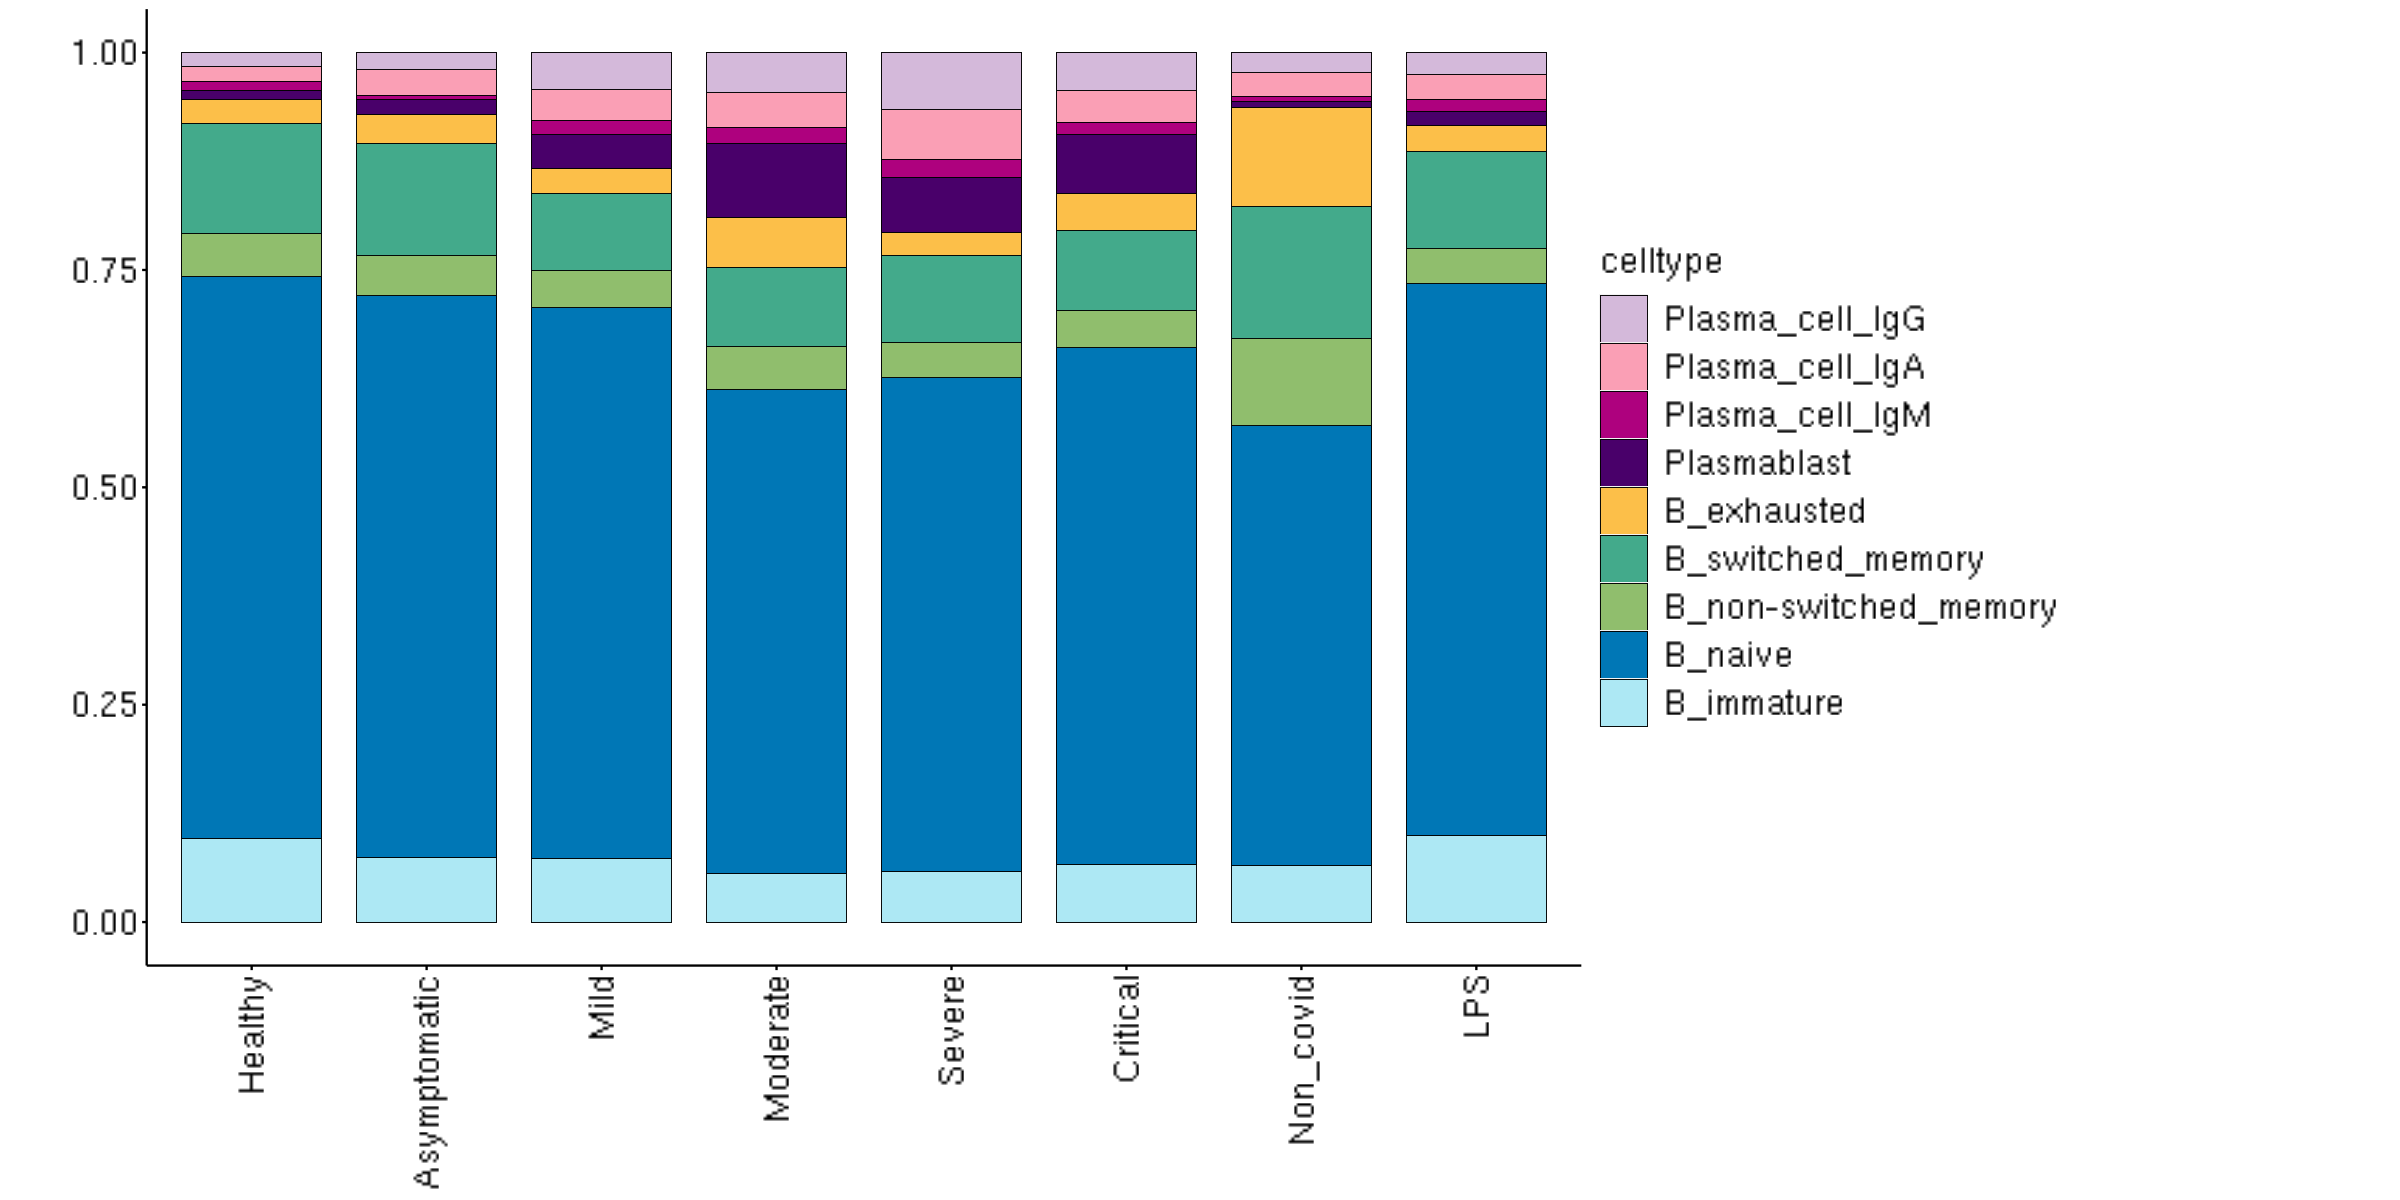

In [8]:
options(repr.plot.width=20, repr.plot.height=10)
g <- ggplot(df, aes(x=diagnosis, y = mean, fill=celltype))+ 
    geom_bar(position="fill", stat="identity", width = 0.8, colour = "black", size=0.2)+
      theme(aspect.ratio = 2/3)+ 
      theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 20, color = 'black')) +
theme(axis.text.y = element_text(size = 20, color = 'black')) +
theme(axis.title.x=element_blank(), axis.title.y=element_blank())+
theme(legend.text = element_text(size = 20)) +
scale_fill_manual(values = rev(c('#ade8f4', '#0077b6', '#90be6d', '#43aa8b', '#fcbf49', '#49006a','#ae017e', '#fa9fb5', '#d4b9da')))+ 
theme(panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(),
      panel.background = element_blank(), 
      axis.line = element_line(colour = "black"),
      axis.ticks = element_line(colour = "black")) + small_legend(keysize = 2, fontsize = 20)
g

In [9]:
df

diagnosis,celltype,mean
<fct>,<fct>,<dbl>
Asymptomatic,B_exhausted,0.034223945
Asymptomatic,B_immature,0.074900586
Asymptomatic,B_naive,0.649183611
Asymptomatic,B_non-switched_memory,0.047158012
Asymptomatic,B_switched_memory,0.128958628
Asymptomatic,Plasma_cell_IgA,0.029415119
Asymptomatic,Plasma_cell_IgG,0.019772017
Asymptomatic,Plasma_cell_IgM,0.005395494
Asymptomatic,Plasmablast,0.016428403


In [10]:
df <- bcells %>% 
  group_by(study_id, Status_on_day_collection_summary_v2, celltype_B) %>%
  summarise(total = n()) %>% mutate(freq = total / sum(total))
df

`summarise()` regrouping output by 'study_id', 'Status_on_day_collection_summary_v2' (override with `.groups` argument)



study_id,Status_on_day_collection_summary_v2,celltype_B,total,freq
<fct>,<fct>,<fct>,<int>,<dbl>
AP1,Severe,B_exhausted,3,0.01435407
AP1,Severe,B_immature,12,0.05741627
AP1,Severe,B_naive,94,0.44976077
AP1,Severe,B_non-switched_memory,10,0.04784689
AP1,Severe,B_switched_memory,25,0.11961722
AP1,Severe,Plasma_cell_IgA,25,0.11961722
AP1,Severe,Plasma_cell_IgG,26,0.12440191
AP1,Severe,Plasma_cell_IgM,9,0.04306220
AP1,Severe,Plasmablast,5,0.02392344


In [11]:
write.csv(df, 'other_analyses/all_B_cell_proportions_v2.csv')

In [12]:
kelvinny::dirCreate('figures/barcharts')
ggsave('figures/barcharts/bcell_prop_v2.pdf', plot = g, h = 7, w = 7)

In [3]:
## for isotypes
bcells <- read.csv('h5ad/covid_jan_2021_bcells_obs_vdj.csv', header= TRUE, row.names = 1)
df <- bcells %>% filter(celltype_B_v2 %in% c('Plasmablast', 'Plasma_cell')) %>% filter(isotype %in% c('IgM', 'IgD', 'IgA', 'IgE', 'IgG'))  %>%
  filter(Status_on_day_collection_summary_v2 %in% c("Healthy", "Asymptomatic", "Mild", "Moderate", "Severe", "Critical")) %>%
  group_by(sample_id, Status_on_day_collection_summary_v2, isotype) %>%
  summarise(total = n())%>%
  mutate(freq = total / sum(total))

colnames(df)<-c("sample_id", "diagnosis","isotype", "total", "freq")

`summarise()` regrouping output by 'sample_id', 'Status_on_day_collection_summary_v2' (override with `.groups` argument)



In [4]:
df<-df %>% group_by(diagnosis, isotype) %>% summarise(mean = mean(freq))

`summarise()` regrouping output by 'diagnosis' (override with `.groups` argument)



In [5]:
df$diagnosis <- factor(df$diagnosis, levels = c("Healthy", "Asymptomatic", "Mild", "Moderate", "Severe", "Critical"))
df$isotype <- factor(df$isotype, levels = rev(c('IgM', 'IgD', 'IgA', 'IgE', 'IgG')))

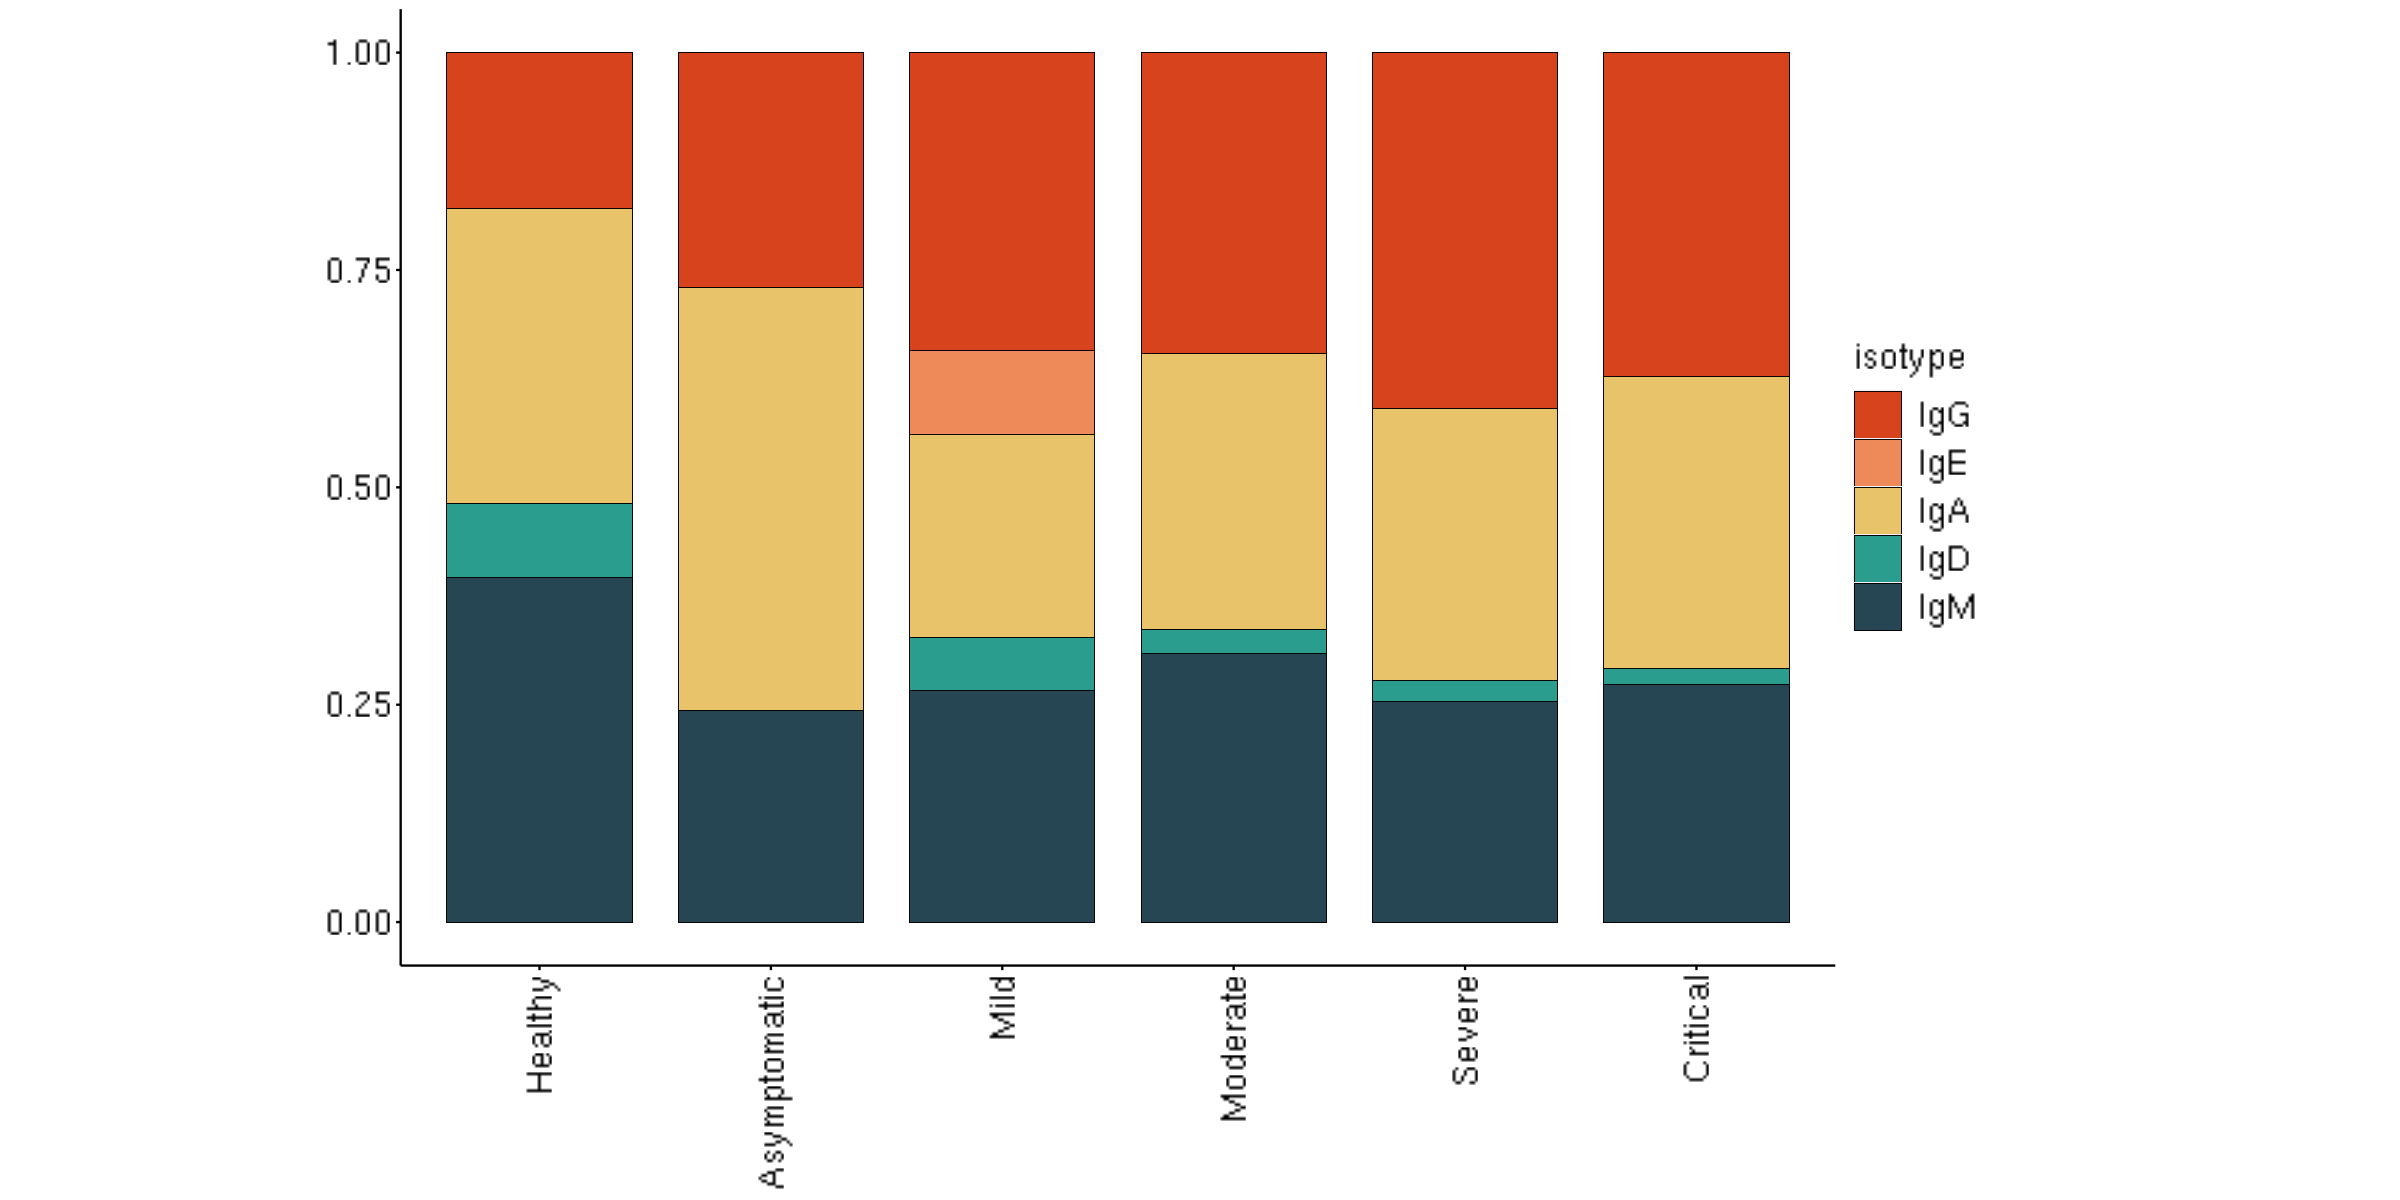

In [6]:
options(repr.plot.width=20, repr.plot.height=10)
g <- ggplot(df, aes(x=diagnosis, y = mean, fill=isotype))+ 
    geom_bar(position="fill", stat="identity", width = 0.8, colour = "black", size=0.2)+
      theme(aspect.ratio = 2/3)+ 
            theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 20, color = 'black')) +
theme(axis.text.y = element_text(size = 20, color = 'black')) +
theme(axis.title.x=element_blank(), axis.title.y=element_blank())+
theme(legend.text = element_text(size = 20)) +
scale_fill_manual(values = rev(c('#264653', '#2A9D8F', '#E9C369', '#EE8959', '#D7431D')))+ 
theme(panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(),
      panel.background = element_blank(), 
      axis.line = element_line(colour = "black"),
      axis.ticks = element_line(colour = "black")) + small_legend(keysize = 2, fontsize = 20)
g

In [7]:
kelvinny::dirCreate('figures/barcharts')
ggsave('figures/barcharts/isotype_prop_v2.pdf', plot = g, h = 7, w = 7)

In [8]:
df <- bcells %>% filter(celltype_B_v2 %in% c('Plasmablast', 'Plasma_cell')) %>% filter(isotype %in% c('IgM', 'IgD', 'IgA', 'IgE', 'IgG'))  %>%
  group_by(sample_id, Status_on_day_collection_summary_v2, isotype) %>%
  summarise(total = n())%>%
  mutate(freq = total / sum(total))

colnames(df)<-c("sample_id", "diagnosis","isotype", "total", "freq")
df$diagnosis <- factor(df$diagnosis, levels = c("Healthy", "Asymptomatic", "Mild", "Moderate", "Severe", "Critical", "Non_covid", "LPS"))
df$isotype <- factor(df$isotype, levels = rev(c('IgM', 'IgD', 'IgA', 'IgE', 'IgG')))
write.csv(df, 'h5ad/isotype_proportion.csv')

`summarise()` regrouping output by 'sample_id', 'Status_on_day_collection_summary_v2' (override with `.groups` argument)



In [9]:
## subclass

In [10]:
df <- bcells %>% filter(celltype_B_v2 %in% c('Plasmablast', 'Plasma_cell')) %>% filter(c_call_heavy %in% c('IGHM', 'IGHD', 'IGHA1', 'IGHA2', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHE'))  %>%
  group_by(sample_id, Status_on_day_collection_summary_v2, c_call_heavy) %>%
  summarise(total = n())%>%
  mutate(freq = total / sum(total))

colnames(df)<-c("sample_id", "diagnosis","isotype", "total", "freq")

`summarise()` regrouping output by 'sample_id', 'Status_on_day_collection_summary_v2' (override with `.groups` argument)



In [11]:
df

sample_id,diagnosis,isotype,total,freq
<fct>,<fct>,<fct>,<int>,<dbl>
AP1,Severe,IGHA1,9,0.204545455
AP1,Severe,IGHA2,3,0.068181818
AP1,Severe,IGHG1,17,0.386363636
AP1,Severe,IGHG3,1,0.022727273
AP1,Severe,IGHM,14,0.318181818
AP10,Mild,IGHA1,7,0.057377049
AP10,Mild,IGHA2,4,0.032786885
AP10,Mild,IGHD,1,0.008196721
AP10,Mild,IGHG1,8,0.065573770


In [12]:
write.csv(df, 'h5ad/subclass_proportion.csv')

In [13]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/R/lib/libRblas.so

locale:
[1] en_GB.utf8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ktplots_1.1.7  ggplot2_3.3.2  reshape2_1.4.4 dplyr_1.0.0   

loaded via a namespace (and not attached):
 [1] bitops_1.0-6                matrixStats_0.57.0         
 [3] fs_1.5.0                    doMC_1.3.7                 
 [5] usethis_1.6.3               devtools_2.3.2             
 [7] RColorBrewer_1.1-2          rprojroot_1.3-2            
 [9] GenomeInfoDb_1.22.1         repr_1.1.0                 
[11] tools_3.6.1                 backports_1.2.0            
[13] R6_2.5.0                    BiocGenerics_0.32.0        
[15] colorspace_1.4-1            withr_2.3.0                
[17] tidyselect_1.1.0            gri